## Setup

In [1]:
import numpy as np
import pandas as pd
import math

import colorsys
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.utils.extmath import cartesian

sns.set()

In [2]:
pd.set_option('display.max_columns', None)

In [297]:
data = pd.read_csv('pulsifi_colors.csv')
data.drop(columns='Unnamed: 0', inplace=True)

In [260]:
# data = pd.read_csv('1384367562_colors_in_9_langages.csv', usecols=[0,1,2,3,20,21,21,23,24])
# data = data.sort_values(['cx', 'cy']).reset_index().rename(columns={'index': 'order'})

### Plotting Data

In [261]:
# data.sort_values(['cx', 'cy'])
# target = data['RGB']

In [262]:
# fig, ax = plt.subplots(figsize = (10,10))
# ax.scatter(data['cx'], data['cy'], c =target)

### Scaling the Data

In [300]:
data.head(3)

,order,r,g,b,h,s,v,names
0,10,255,240,241,356,6,100,red1
1,11,255,237,239,353,7,100,red2
2,12,255,196,204,352,23,100,red3


In [265]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['scaled_order'] = scaler.fit_transform(data['order'].values.reshape(-1, 1))

## Random Forest Regressor

Idea: Use Random Forest Regressor for every R, G, B colors as input (from 0 to 1 - rescaled from 0 to 255) and spit out the R, G, B in the spectrum

In [266]:
from sklearn.ensemble import RandomForestRegressor

In [267]:
ranking = data.scaled_order.values.reshape(-1, 1)

In [268]:
reds = RandomForestRegressor(n_estimators = 10, random_state = 0)
reds.fit(ranking, data['r'])

greens = RandomForestRegressor(n_estimators = 10, random_state= 0)
greens.fit(ranking, data['g'])

blues = RandomForestRegressor(n_estimators= 10, random_state=0)
blues.fit(ranking, data['b'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [269]:
0.0147/2

0.00735

In [270]:
max_increase = 40
value_list = []

def counter(value):
    counter = 0
    while counter < max_increase:
        value += 0.00735
        value_list.append(round(value, 4))
        counter += 1

In [271]:
counter(0.15)

In [272]:
value_list

[0.1573,
 0.1647,
 0.172,
 0.1794,
 0.1867,
 0.1941,
 0.2014,
 0.2088,
 0.2161,
 0.2235,
 0.2308,
 0.2382,
 0.2455,
 0.2529,
 0.2602,
 0.2676,
 0.275,
 0.2823,
 0.2897,
 0.297,
 0.3044,
 0.3117,
 0.3191,
 0.3264,
 0.3338,
 0.3411,
 0.3485,
 0.3558,
 0.3632,
 0.3705,
 0.3779,
 0.3852,
 0.3926,
 0.3999,
 0.4073,
 0.4146,
 0.422,
 0.4293,
 0.4367,
 0.444]

In [273]:
predicted_frame = []
temp_frame = []

def predict_rgb(value_to_rgb):
    """
    For a list of input values (0 to 1) output the RGB values and append it to a list of lists.

    """
    for values in value_to_rgb:
        
        res_r = str(reds.predict([[values]])[0])
        if len(res_r)==5:
            res_r = res_r[:3] # int(res_r[:3])
        else:
            res_r = res_r[:2] # int(res_r[:2])

        res_g = str(greens.predict([[values]])[0])
        if len(res_g)==5:
            res_g = res_g[:3] # int(res_g[:3])
        else:
            res_g = res_g[:2] # int(res_g[:2])

        res_b = str(blues.predict([[values]])[0])
        if len(res_b)==5:
            res_b = res_b[:3] # int(res_b[:3])
        else:
            res_b = res_g[:2] #int(res_b[:2])

        rgb_values = (int(res_r), int(res_g), int(res_b))
        temp_frame.append(rgb_values)
        
    for value in temp_frame:
        if value not in predicted_frame:
            predicted_frame.append(value)

In [274]:
predict_rgb(value_list)

In [275]:
predicted_frame

[(255, 233, 235),
 (255, 228, 232),
 (255, 204, 211),
 (255, 196, 204),
 (255, 180, 191),
 (255, 163, 179),
 (247, 103, 134),
 (246, 99, 130),
 (216, 60, 60),
 (196, 45, 45),
 (169, 32, 32),
 (135, 21, 21),
 (120, 17, 17),
 (117, 37, 37),
 (130, 60, 60),
 (209, 177, 177),
 (238, 209, 182),
 (255, 220, 175),
 (255, 216, 167),
 (255, 194, 126),
 (255, 180, 101),
 (255, 170, 17),
 (251, 153, 15),
 (236, 129, 12),
 (216, 108, 10),
 (182, 81, 81),
 (159, 65, 65),
 (140, 52, 52),
 (132, 48, 48),
 (121, 43, 43),
 (167, 123, 12),
 (224, 209, 188)]

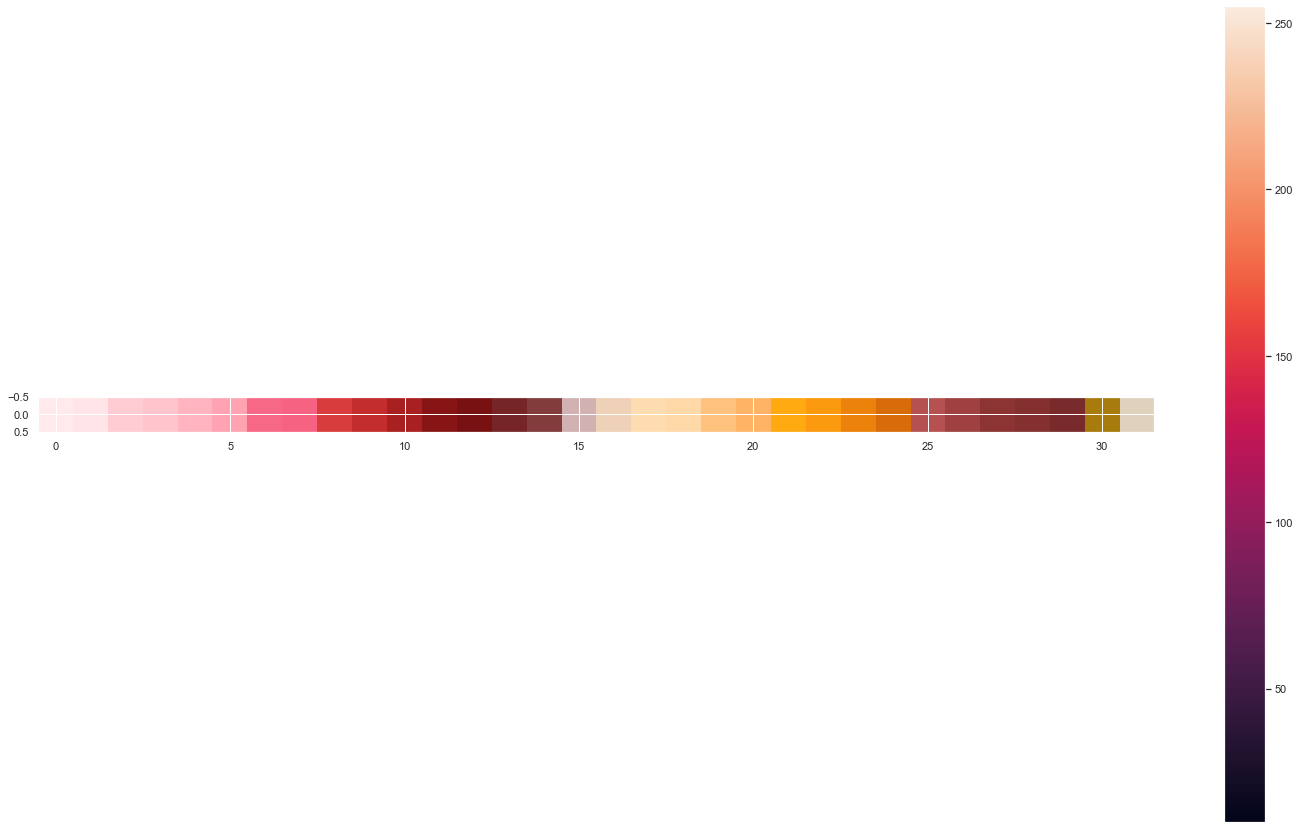

In [278]:
plt.figure(figsize=(25,15))
plt.imshow([predicted_frame])
plt.colorbar()
plt.show()

In [225]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = regressor.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = 'r', rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

graph.write_png('tree.png')